<a href="https://www.kaggle.com/mindadeepam/classification-algorithms?scriptVersionId=89120139" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 877 kB/s            


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


In [3]:
pd.set_option('display.max_columns', None)

df = pd.read_excel("../input/pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset.xlsx")
# test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [5]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [6]:
df.dtypes           # 12 numeric features - 1 object class label
df.Class.unique()   # 2 unique classes

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [7]:
df.info()           # no null values in df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


## Exploratory Data Analysis

<AxesSubplot:xlabel='Class', ylabel='count'>

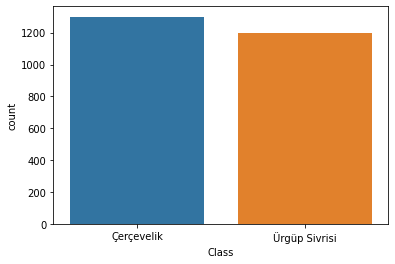

In [8]:
sns.countplot(x='Class',data=df)      ## over 1000 samples for both

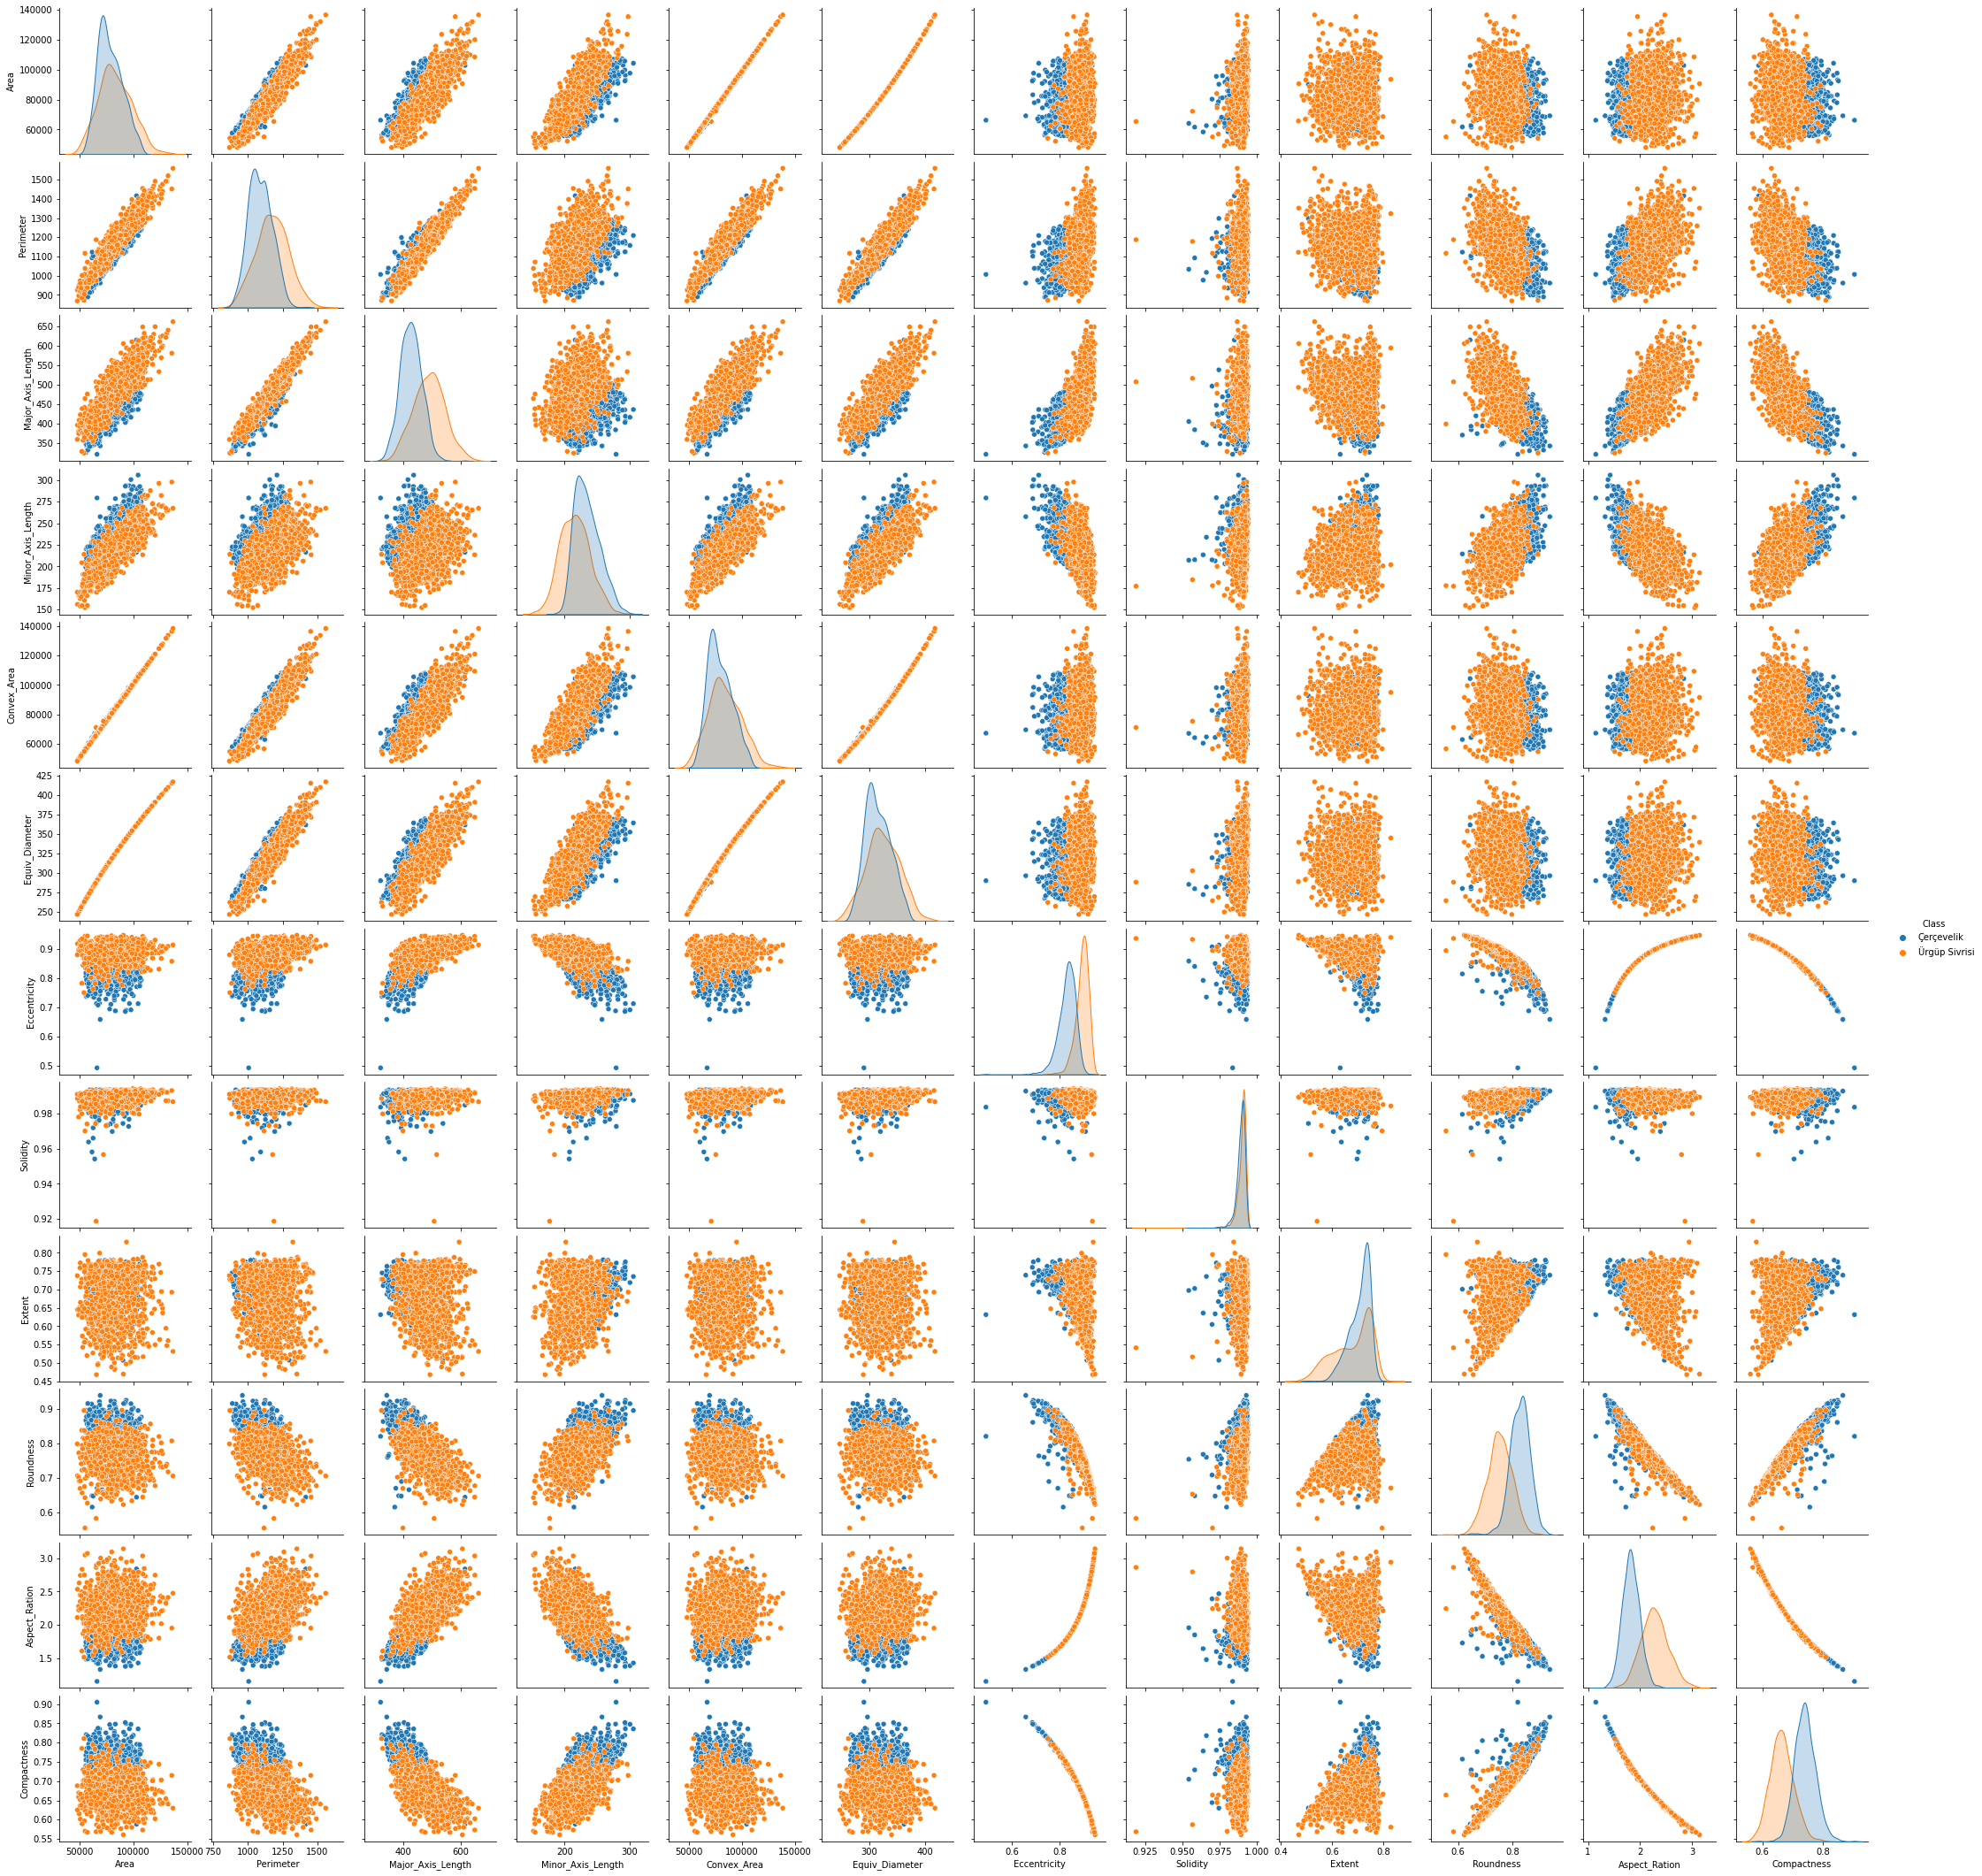

In [9]:
sns.pairplot(data=df,  hue='Class')

                Equiv_Diameter  Convex_Area      Area
Equiv_Diameter        1.000000     0.998289  0.998464
Convex_Area           0.998289     1.000000  0.999806
Area                  0.998464     0.999806  1.000000


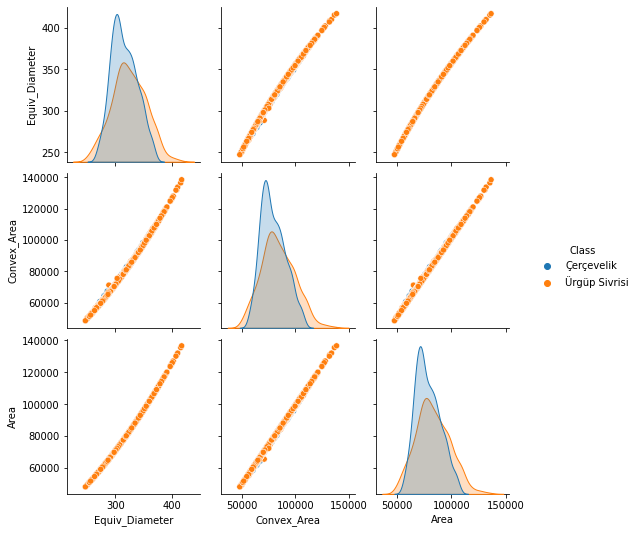

In [10]:
# Equiv_Diameter, Convex_Area and Area seem highly correalated
temp_data = df[['Equiv_Diameter','Convex_Area', 'Area', 'Class']]
sns.pairplot(temp_data, hue="Class")
print(temp_data.corr())                         ## >0.99 correlation

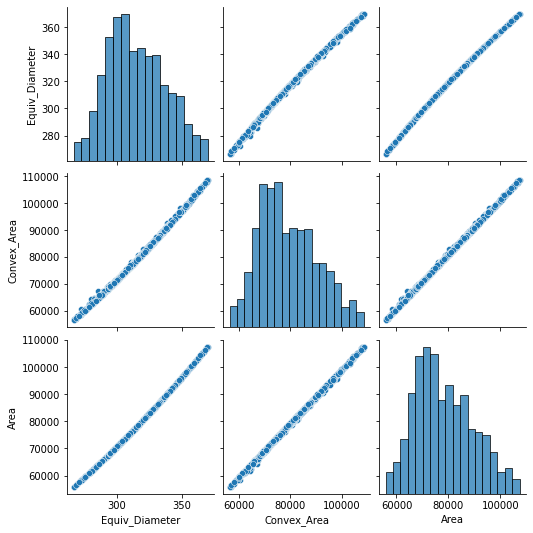

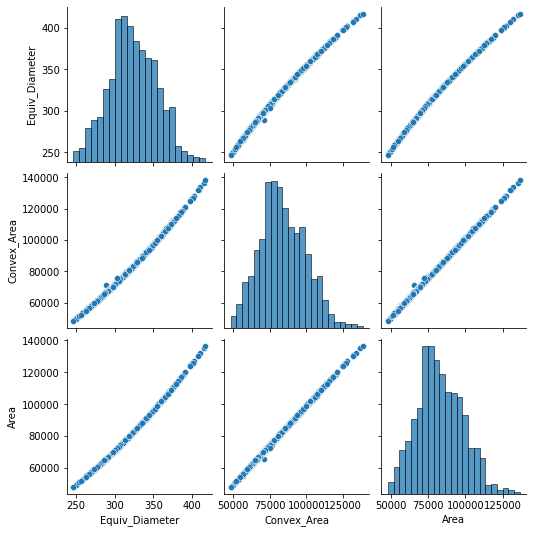

In [11]:
# plt.subplots(2,2)
sns.pairplot(temp_data[temp_data['Class']=='Çerçevelik'], palette='tab10')
sns.pairplot(temp_data[temp_data['Class']!='Çerçevelik'])

               Compactness  Aspect_Ration  Eccentricity
Compactness       1.000000      -0.990778     -0.981689
Aspect_Ration    -0.990778       1.000000      0.950225
Eccentricity     -0.981689       0.950225      1.000000


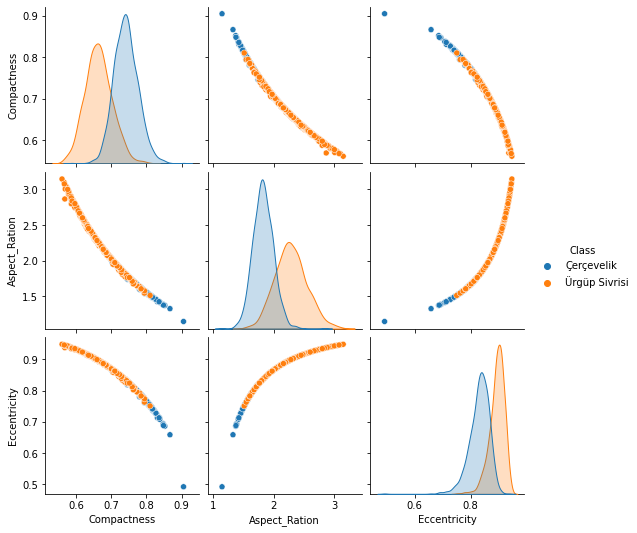

In [12]:
## Compactness, Aspect_Ration and Eccentricity seem highly correlated
temp_data = df[['Compactness', 'Aspect_Ration', 'Eccentricity','Class']]
sns.pairplot(temp_data, hue='Class')
print(temp_data.corr())

# Compactness and Aspect_ratio have -.99 corr, 
# Comp and Eccen have -.98 corr
# Eccen and Aspect have .95 corr

#### But as seen while building models, dropping any single or multiple collinear features doesnt improve performance 

## Remove Outliers ..

<AxesSubplot:xlabel='Eccentricity'>

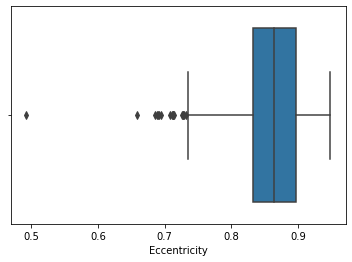

In [13]:
sns.boxplot(x='Eccentricity',data=df)


## Models

In [14]:
## does dropping collinear features increase accuracy??

df_ = df.drop(['Aspect_Ration'], axis=1)      ## harms performance
# 'Compactness', 'Aspect_Ration', 'Eccentricity' ; 'Convex_Area??', 'Area', Equiv_Diameter'
# remove =   nothing seems to give better preformance consistently


In [15]:
# df_ = df.drop(['Equiv_Diameter'], axis=1)        ## dropping doesnt seem to have any benefits
X = df.drop('Class',axis=1).to_numpy()
y = df["Class"].to_numpy()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# why does scaling harm performance in l2 ..??
# but scaling required for liblinear solver

## Logistic Regression

In [17]:
# clf = LogisticRegression( C=1, random_state=460, max_iter=300)

clf = LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=460, max_iter=500)
## as we make reg constant very large, ie C-->0 == score--> 0.52] ;  l2
## as c->> very large, ie as regularization->0 score->.88 ; .87

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train), clf.score(X_test, y_test))      
# train 0.88

0.8853333333333333 0.888


- l2 reg score = 0.875, .88 without scaling
- l1 reg score = 0.875 0.9056

## KNN

In [18]:
clf = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
print(clf.score(X_train, y_train), clf.score(X_test, y_test))   
## train 0.89

0.8810666666666667 0.8832


- .889 train ; .875 test 
- not much different from logistic regression

In [19]:
## encoding of labels is not required for sklearn classifiers
def encode(x):
    if x == 'Çerçevelik':
        return 0
    return 1

## SVM

In [20]:
clf = svm.SVC(kernel='poly', degree=1)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train), clf.score(X_test, y_test)) 
  
## poly 1-.873, .893 ; 2-.78, .766 ; 3-.85, .85; 4-.77, .77; 5-.80, .79...  drops off as degree increases
## rbf = .88, .88

0.8746666666666667 0.8848


#### why is svm giving low score sometimes.....??? also, increasing degree in poly kernel doesnt increase train accuracy.??


## Naive Bayes

In [21]:
## though not all features have gaussian distribution, that would be the best assumption..
